In [1]:
from networks import *

In [2]:
features = ['r']
target = ['r']
window = 24
forward_length = 2

reader = PriceReader()
val = reader(['BERRIES'], [2])
val_set = Unsupervised(val, window, features, forward_length)
vl = DataLoader(val_set, batch_size=1, num_workers=16, shuffle=False)

In [3]:
val['mid_price']

timestamp
0         3852.0
100       3850.5
200       3851.0
300       3851.5
400       3852.0
           ...  
999500    3908.5
999600    3907.5
999700    3907.5
999800    3907.5
999900    3907.0
Name: mid_price, Length: 10000, dtype: float64

<Axes: xlabel='timestamp'>

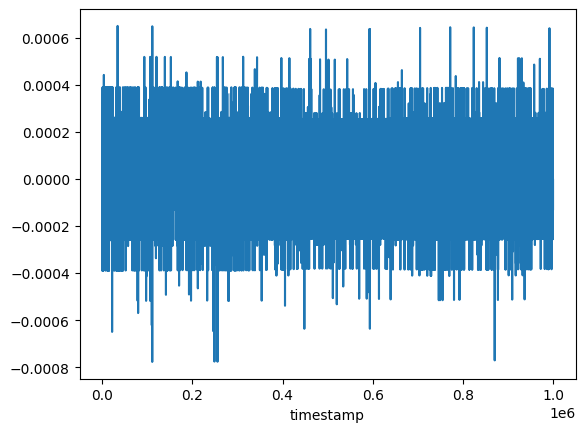

In [8]:
val['r'].plot()

In [11]:
3850 * 0.0004

1.54

In [4]:
model = NetTrader.load_from_checkpoint('checkpoints/epoch=4-step=3125.ckpt')

In [5]:
i1 = val_set[0]

[[ 0.        ]
 [-0.00038941]
 [ 0.00012985]
 [ 0.00012984]
 [ 0.00012982]
 [-0.00025961]
 [-0.00036354]
 [-0.00028574]
 [ 0.00025984]
 [ 0.        ]
 [ 0.        ]
 [ 0.00038966]
 [-0.00038951]
 [ 0.00012989]
 [ 0.00012987]
 [-0.00025971]
 [ 0.        ]
 [ 0.        ]
 [ 0.00038966]
 [-0.00038951]
 [ 0.00012989]
 [ 0.00012987]
 [ 0.        ]
 [ 0.        ]]


In [6]:
i1

(tensor([ 0.0700, -1.6117,  0.6310,  0.6310,  0.6311, -1.0507, -1.4995, -1.1634,
          1.1930,  0.0709,  0.0710,  1.7540, -1.6111,  0.6322,  0.6323, -1.0502,
          0.0716,  0.0717,  1.7547, -1.6104,  0.6329,  0.6330,  0.0722,  0.0723]),
 tensor([-0.0001, -0.0001]))

In [ ]:
out = model(in1[0])

In [ ]:
out = out.detach().numpy()

In [ ]:
out

In [ ]:
val['strat'] = [0] * 10000
val['strat'][:9974]  = val['r'].shift(-1)[:9974] * out[:, 0]
val['strat'] += 1
val['strat'] = val['strat'].cumprod()

In [ ]:
val['strat'].plot()

In [ ]:
import pyperclip
print(model.state_dict().keys())

In [ ]:
i = 0

In [ ]:
layer = list(model.state_dict().keys())[i]
pyperclip.copy(str(array_to_bytes(model.state_dict()[layer].numpy().astype(np.float16))))
print(model.state_dict()[layer].numpy().shape)
i += 1

In [ ]:
model.state_dict()['model.hidden.0.weight'].numpy().T

In [7]:
np.std([0, 0])

0.0